# **MET-MALE ASSIGNMENT 1**

**Q1)**KMeans partitions data into k number of clusters by first randomly picking some central points (called centroids) and then assigning every data point to the nearest centroid.

Once that’s done, the centroids are updated by calculating the mean of all points in each cluster. This process repeats itself until convergence, where the choice of centroids no longer changes.

The objective of KMeans is to minimize the Within-Cluster Sum of Squares (WCSS), which is the sum of squared distances between each point and its respective centroid and it is an expression of the variation within each cluster. In short, for a given number of clusters the algorithm finds the cluster assignment (centroids) that minimizes WCSS by iteratively adjusting the centroids and reassigning data points.



**Q2)** KMeans++ improves the initialization of centroids by selecting the first centroid randomly, and then choosing subsequent centroids with a probability proportional to their distance squared from the nearest existing centroid. This ensures that centroids are well spread out, reducing the likelihood of poor clustering results that follow from random initialization in the original Kmeans.

**Q3)**

1.   WCSS: Measures the compactness of clusters by calculating the sum of squared distances between points and their respective centroids.
2.   Silhouette Scores measure of "how well" clusters are formed. It combines both cohesion (how close points are within a cluster) and separation (how far apart the clusters are). It's a mean of the silhoutte score of each cluster and scores range from -1 to 1, where 1 indicates good clustering.
1.  The Dunn Index is a ratio of the smallest inter-cluster distance (distance between the closest points in different clusters) to the largest intra-cluster distance (diameter of the largest cluster).Higher values indicate better clustering with well-separated and compact clusters.

**Q4)**

In [1]:
pip install kmodes

In [22]:
#load needed packages
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from kmodes.kprototypes import KPrototypes
from sklearn.cluster import AgglomerativeClustering
from kmodes.kprototypes import KPrototypes
from sklearn.mixture import GaussianMixture
import numpy as np
from scipy.cluster.hierarchy import linkage, fcluster
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import adjusted_rand_score
from sklearn.datasets import make_blobs
from sklearn.preprocessing import LabelEncoder

In [13]:
# Load the dataset into a pandas DataFrame
url = 'https://raw.githubusercontent.com/ielbadisy/healthdatasets/master/ketapain.csv'
df = pd.read_csv(url)
print(df.head())

# Scale the numeric variables by first identifying the numeric columns but not the ID one
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns.drop('patientID')
scaler = StandardScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

# Check scaled data
print(df.head())


   patientID    sexe  age  av_dose level_dose  cum_dose  cum_days  perfusion  \
0       6317  female   35    0.700   low dose     269.5         5       24.0   
1       2517  female   76    0.700   low dose     269.5         5       24.0   
2       1023  female   18    0.075   low dose      63.0        12        4.0   
3       3002  female   50   74.000   low dose     222.0         3       24.0   
4       7702    male   46   74.000   low dose     222.0         3       24.0   

       cost      qaly        mode  
0   4689.95  0.329389     continu  
1   4689.95  0.690946     continu  
2  11165.30  0.317344  discontinu  
3   2829.20  0.048617     continu  
4   2829.20  0.634071     continu  
   patientID    sexe       age   av_dose level_dose  cum_dose  cum_days  \
0       6317  female -1.285983 -0.613731   low dose  0.460077  0.399186   
1       2517  female  2.153030 -0.613731   low dose  0.460077  0.399186   
2       1023  female -2.711915 -0.630121   low dose -1.300497  3.459613   
3  

**Q5)** By definition, as the number of clusters increases, within-cluster variation (given by the WCSS) will fall , tending towards 0. Using the elbow method, we plot the reduction in WCSS that comes from an increase in the number of clusters. At the beginning, the reduction in variation from an extra cluster is increasing but because of deminishing returns, it eventually starts to fall. The elbow-method consists of finding the point (elbow) at which this happens.

On the other hand, for the siloutte method we plot the average Silhouette Scores against k. The optimal k is the one with the highest Silhouette Score.

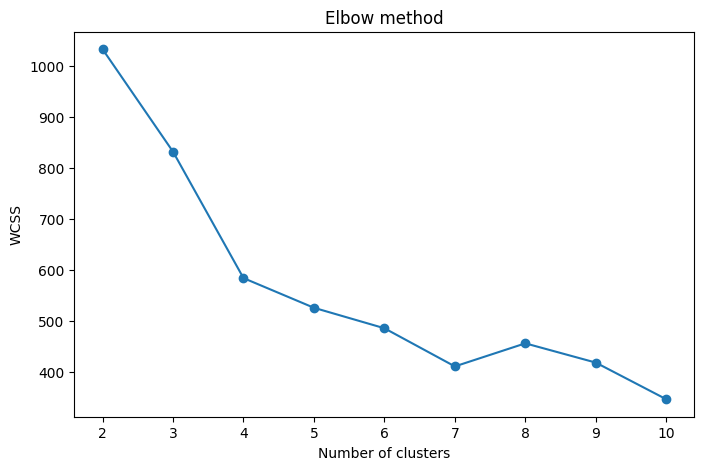

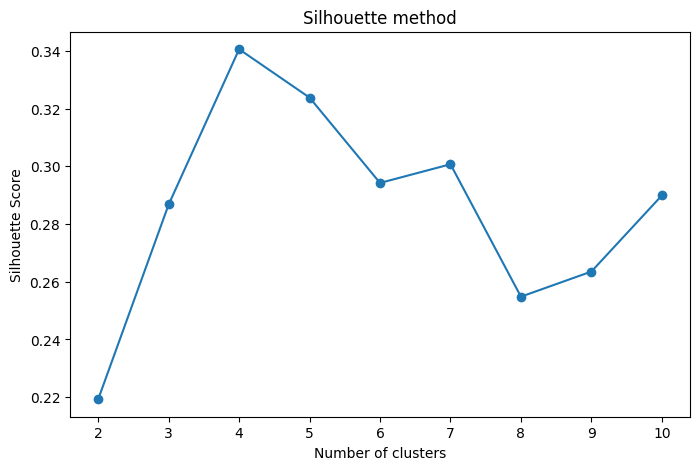

In [14]:
# Elbow Method
wcss = []
range_clusters = range(2, 11)  # I will show from k=2 to k =10

for k in range_clusters:
    kmeans = KMeans(n_clusters=k, random_state=42) #creates KMeans model for each k in the loop.set seed for reproducibility
    kmeans.fit(df[numeric_cols]) #fit model to the data
    wcss.append(kmeans.inertia_) #store the WCSS in the list

# Plot the Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(range_clusters, wcss, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Silhouette Method
silhouette_scores = []

for k in range_clusters:
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(df[numeric_cols])  # get clusters assignments for each point
    silhouette_avg = silhouette_score(df[numeric_cols], cluster_labels)  # Calculate silhouette score for each k
    silhouette_scores.append(silhouette_avg)

# Plot the Silhouette Scores
plt.figure(figsize=(8, 5))
plt.plot(range_clusters, silhouette_scores, marker='o')
plt.title('Silhouette method')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()

Both the Elbow Method and the Silhouette Method suggest that 4 clusters is the optimal number for this data.


**Q6) and Q7)**

In [15]:
# Define the optimal number of clusters according to the answer above
optimal_clusters = 4

# KMeans clustering with random initialization
kmeans_random = KMeans(n_clusters=optimal_clusters, init='random', n_init=10, random_state=42)
kmeans_random.fit(df[numeric_cols])
clusters_random = kmeans_random.labels_

# KMeans clustering with KMeans++ initialization
kmeans_plus = KMeans(n_clusters=optimal_clusters, init='k-means++', n_init=10, random_state=42)
kmeans_plus.fit(df[numeric_cols])
clusters_plus = kmeans_plus.labels_

# Compare cluster labels from random and KMeans++ initialization
ari = adjusted_rand_score(clusters_random, clusters_plus)
print(f"Adjusted Rand Index (ARI): {ari:.3f}")

# Calculate silhouette scores
silhouette_random = silhouette_score(df[numeric_cols], clusters_random)
silhouette_plus = silhouette_score(df[numeric_cols], clusters_plus)

# Print the silhouette scores
print(f"Silhouette Score (Random Initialization): {silhouette_random:.3f}")
print(f"Silhouette Score (KMeans++ Initialization): {silhouette_plus:.3f}")

# Compare results
print("\nClustering comparison:")
print(f"WCSS (Random Initialization): {kmeans_random.inertia_:.2f}")
print(f"WCSS (KMeans++ Initialization): {kmeans_plus.inertia_:.2f}")

Adjusted Rand Index (ARI): 1.000
Silhouette Score (Random Initialization): 0.341
Silhouette Score (KMeans++ Initialization): 0.341

Clustering comparison:
WCSS (Random Initialization): 584.06
WCSS (KMeans++ Initialization): 584.06


When k=4 (optimal number of clusters), both initialization methods form the exact same clusters which indicates the  data clusters are well-separated and stable.
The results begin to diverge slightly when the number of clusters moves away from its optimum, because the data is harder to cluster correctly, and the initialization method plays a larger role in determining the clustering outcome.

**Q8)**

In [16]:
# KMeans Clustering
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=42)
kmeans_labels = kmeans.fit_predict(df[numeric_cols])

print("KMeans Clustering Labels:")
print(kmeans_labels)

# #Kprototypes is the only one that can handle cateogircal data but I need to convert categorical columns to string format (required by KPrototypes)
categorical_cols = df.select_dtypes(include=['object']).columns #identify those that are not nummerical
df[categorical_cols] = df[categorical_cols].astype(str) #convert to string

# Convert categorical column indices to a list of indices
categorical_indices = [df.columns.get_loc(col) for col in categorical_cols]

# KPrototypes Clustering
kproto = KPrototypes(n_clusters=4, random_state=42)
kproto_labels = kproto.fit_predict(df.values, categorical=categorical_indices) #this algorithm takes the indices instead of the column names

print("KPrototypes Clustering Labels:")
print(kproto_labels)

# Agglomerative Hierarchical Clustering
agglo = AgglomerativeClustering(n_clusters=4, linkage='ward')
agglo_labels = agglo.fit_predict(df[numeric_cols])

print("Agglomerative Clustering Labels:")
print(agglo_labels)

# Gaussian Mixture Models (GMM)
gmm = GaussianMixture(n_components=4, random_state=42)
gmm_labels = gmm.fit_predict(df[numeric_cols])

print("GMM Clustering Labels:")
print(gmm_labels)


KMeans Clustering Labels:
[0 0 3 1 1 2 1 0 1 0 1 2 2 1 1 2 1 0 2 2 2 0 2 1 2 0 0 2 1 1 1 2 0 1 1 0 1
 0 1 2 2 2 3 1 0 0 1 2 1 3 2 2 0 2 2 2 2 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 1
 0 0 0 0 2 1 2 0 2 2 2 3 1 1 1 1 2 0 1 0 0 2 0 0 1 2 0 2 2 2 1 0 1 1 1 2 2
 3 0 0 1 0 0 1 0 0 2 0 2 1 0 0 0 0 3 0 0 0 2 0 2 2 0 2 0 0 0 0 2 1 2 3 0 0
 0 1 0 3 2 0 1 2 3 0 0 2 2 1 2 2 2 0 1 0 2 3 2 1 1 1 2 1 1 0 1 1 0 2 1 1]
KPrototypes Clustering Labels:
[1 2 0 2 3 0 0 0 2 0 3 0 0 2 3 2 2 1 0 0 0 0 0 0 0 0 1 0 3 0 0 0 2 0 0 0 0
 1 1 0 0 0 0 1 1 1 3 0 0 0 0 0 0 0 0 0 2 1 3 0 2 1 1 0 0 1 2 2 0 0 0 2 2 3
 0 0 0 0 2 2 0 1 0 0 0 0 1 3 2 0 0 2 3 2 2 0 0 1 3 0 0 0 0 0 1 1 2 2 1 0 0
 0 0 0 0 0 2 2 2 2 2 0 0 3 2 0 0 0 0 0 0 1 0 2 0 0 3 0 0 2 1 1 0 1 2 0 1 2
 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 3 0 0 0 0 0 0 3 2 0 1 1 0 0 2 0 0 0]
Agglomerative Clustering Labels:
[1 1 3 0 0 2 0 1 0 1 0 2 2 0 0 2 0 1 2 2 2 1 2 0 2 1 1 2 0 0 0 2 1 0 0 1 0
 1 0 2 2 2 3 0 1 1 0 2 0 3 2 1 1 2 2 2 2 1 1 1 0 1 0 1 1 1 1 1 1 0 1 1 1 0
 1 1 1 1 2 0

**Q9)**

In [18]:
# Combine cluster labels from all algorithms into a single df
cluster_labels = pd.DataFrame({
    'KMeans': kmeans_labels,
    'KPrototypes': kproto_labels,
    'Agglomerative': agglo_labels,
    'GMM': gmm_labels
})

# Start with an an empty consensus matrix
n_samples = len(df)
consensus_matrix = np.zeros((n_samples, n_samples))

# Update the consensus matrix based on agreement across algorithms
for col in cluster_labels.columns:
    for i in range(n_samples):
        for j in range(n_samples):
            if cluster_labels[col][i] == cluster_labels[col][j]:
                consensus_matrix[i, j] += 1

consensus_matrix /= len(cluster_labels.columns)

print("Consensus Matrix:")
print(consensus_matrix)

Consensus Matrix:
[[1.   0.75 0.   ... 0.   0.   0.  ]
 [0.75 1.   0.   ... 0.   0.   0.  ]
 [0.   0.   1.   ... 0.25 0.25 0.25]
 ...
 [0.   0.   0.25 ... 1.   0.25 0.25]
 [0.   0.   0.25 ... 0.25 1.   1.  ]
 [0.   0.   0.25 ... 0.25 1.   1.  ]]


**Q10)**

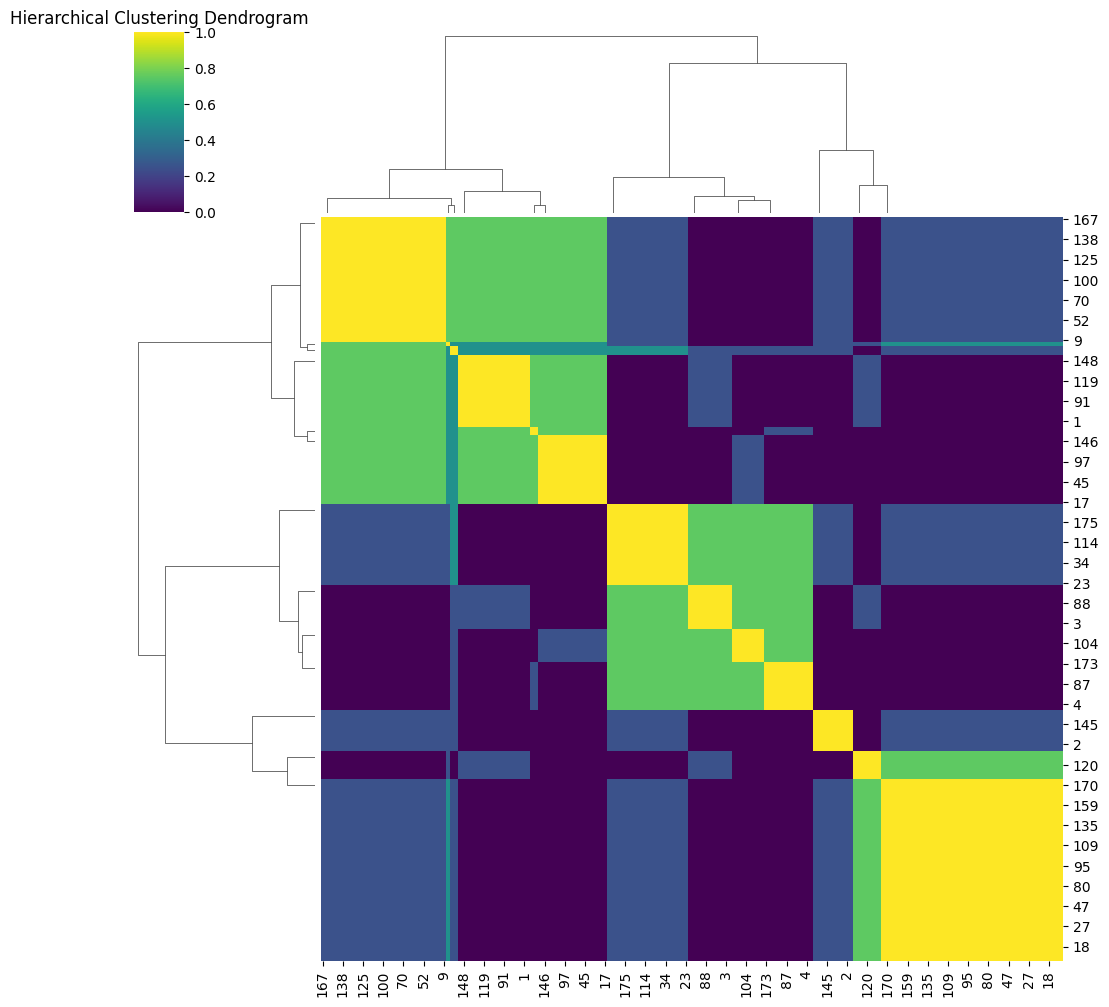

Meta-Clustering Labels:
[1 1 3 2 2 4 2 1 2 1 2 4 4 2 2 4 2 1 4 4 4 1 4 2 4 1 1 4 2 2 2 4 1 2 2 1 2
 1 2 4 4 4 3 2 1 1 2 4 2 3 4 1 1 4 4 4 4 1 1 1 2 1 2 1 1 1 1 1 1 2 1 1 1 2
 1 1 1 1 4 2 4 1 4 4 4 3 2 2 2 2 4 1 2 1 1 4 1 1 2 4 1 4 4 4 2 1 2 2 2 4 4
 3 1 1 2 1 1 2 1 1 4 1 4 2 1 1 1 1 3 1 1 1 4 1 4 4 1 4 1 1 1 1 4 2 4 3 1 1
 1 2 1 3 4 1 2 4 3 1 1 4 4 2 4 4 4 1 2 1 4 3 4 2 2 2 4 2 2 1 2 2 1 4 2 2]


In [19]:
# Apply hierarchical clustering to the consensus matrix
linkage_matrix = linkage(consensus_matrix, method='ward')
meta_labels = fcluster(linkage_matrix, t=4, criterion='maxclust') #t is the number of clusters

# Visualize the hierarchical clustering dendrogram
sns.clustermap(consensus_matrix, row_linkage=linkage_matrix, col_linkage=linkage_matrix, cmap="viridis")
plt.title("Hierarchical Clustering Dendrogram")
plt.show()

print("Meta-Clustering Labels:")
print(meta_labels)


**Q11)**

In [20]:
# Adjusted Rand Index (ARI) for each algorithm
for col in cluster_labels.columns:
    ari = adjusted_rand_score(cluster_labels[col], meta_labels)
    print(f"ARI ({col} vs Meta-Clustering): {ari:.3f}")

# Silhouette Score for each algorithm
for col in cluster_labels.columns:
    silhouette = silhouette_score(df[numeric_cols], cluster_labels[col])
    print(f"Silhouette Score ({col}): {silhouette:.3f}")

high_consensus_threshold = 0.8
high_consensus_agreement = (consensus_matrix >= high_consensus_threshold).sum() / (n_samples * (n_samples - 1))
print(f"High-Consensus Pair Agreement: {high_consensus_agreement:.3f}")

ARI (KMeans vs Meta-Clustering): 0.983
ARI (KPrototypes vs Meta-Clustering): 0.036
ARI (Agglomerative vs Meta-Clustering): 1.000
ARI (GMM vs Meta-Clustering): 0.966
Silhouette Score (KMeans): 0.341
Silhouette Score (KPrototypes): -0.101
Silhouette Score (Agglomerative): 0.338
Silhouette Score (GMM): 0.336
High-Consensus Pair Agreement: 0.133


Agglomerative Clustering and KMeans perform the best in terms of alignment with the meta-clustering (high ARI) and clustering quality (Silhouette Scores). GMM also performs quite well. KPrototypes performs the worst probably because it doesn't align with the consensus of the others.


**Q12)**

In [32]:
# Set a global random seed for reproducibility
np.random.seed(42)

# Create synthetic datasets
n_datasets = 20  # Number of datasets
n_samples = 300  # Number of samples per dataset
n_features = 2   # Number of numeric features
n_clusters = 3   #  number of clusters

# Create datasets
datasets = []
true_labels = []

# If I want to use Kprototypes I need categorical data in my sample:
for i in range(n_datasets):
    # Generate numeric data
    X_numeric, y_true = make_blobs(n_samples=n_samples, centers=n_clusters, n_features=n_features, random_state=i)

    # Generate synthetic categorical data
    categories = ['A', 'B', 'C']
    X_categorical = np.random.choice(categories, size=(n_samples, 1))

    # Combine numeric and categorical data
    X_mixed = np.hstack((X_numeric, X_categorical))
    df_mixed = pd.DataFrame(X_mixed, columns=['Feature1', 'Feature2', 'Category'])

    # Encode categorical features
    df_mixed['Category'] = LabelEncoder().fit_transform(df_mixed['Category'])

    datasets.append(df_mixed)
    true_labels.append(y_true)

# Store ARI scores
ari_scores = {
    'KMeans': [],
    'Agglomerative': [],
    'GMM': [],
    'KPrototypes': []
}

# Store cluster labels
cluster_labels = {
    'KMeans': [],
    'Agglomerative': [],
    'GMM': [],
    'KPrototypes': []
}

for i, df_mixed in enumerate(datasets):
    y_true = true_labels[i]
    numeric_cols = ['Feature1', 'Feature2']

    # KMeans (using only numeric features)
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans_labels = kmeans.fit_predict(df_mixed[numeric_cols])
    cluster_labels['KMeans'].append(kmeans_labels)  # Keep labels for Q13
    ari_scores['KMeans'].append(adjusted_rand_score(y_true, kmeans_labels))

    # Agglomerative Clustering (using only numeric features)
    agglo = AgglomerativeClustering(n_clusters=n_clusters)
    agglo_labels = agglo.fit_predict(df_mixed[numeric_cols])
    cluster_labels['Agglomerative'].append(agglo_labels)
    ari_scores['Agglomerative'].append(adjusted_rand_score(y_true, agglo_labels))

    # GMM (using only numeric features)
    gmm = GaussianMixture(n_components=n_clusters, random_state=42)
    gmm_labels = gmm.fit_predict(df_mixed[numeric_cols])
    cluster_labels['GMM'].append(gmm_labels)
    ari_scores['GMM'].append(adjusted_rand_score(y_true, gmm_labels))

    # KPrototypes (using both numeric and categorical features)
    kproto = KPrototypes(n_clusters=n_clusters, random_state=42)
    kproto_labels = kproto.fit_predict(df_mixed.values, categorical=[2])
    cluster_labels['KPrototypes'].append(kproto_labels)
    ari_scores['KPrototypes'].append(adjusted_rand_score(y_true, kproto_labels))


# Calculate average ARI for each algorithm
avg_ari = {alg: np.mean(scores) for alg, scores in ari_scores.items()}

print("Average ARI Scores:")
for alg, score in avg_ari.items():
    print(f"{alg}: {score:.3f}")

print("KPrototypes outperforms the other algorithms because it incorporates both numeric and categorical features, aligning better with the mixed-type data. KMeans and GMM perform well for numeric data but cannot leverage categorical features.")
print("Agglomerative clustering had the worst performance. In my simulation, I used 'make_blobs' to generate the simulation dataset which I understand creates approximately spherical clusters. Bevcause agglomerative clustering relies on pairwise distance metrics, maybe  is why it has a harder time identifying/modelling the spherical clusters")


Average ARI Scores:
KMeans: 0.939
Agglomerative: 0.918
GMM: 0.934
KPrototypes: 0.940
KPrototypes outperforms the other algorithms because it incorporates both numeric and categorical features, aligning better with the mixed-type data. KMeans and GMM perform well for numeric data but cannot leverage categorical features.
Agglomerative clustering had the worst performance. In my simulation, I used 'make_blobs' to generate the simulation dataset which I understand creates approximately spherical clusters. Bevcause agglomerative clustering relies on pairwise distance metrics, maybe  is why it has a harder time identifying/modelling the spherical clusters


**Q13)**

In [33]:
# Set high-consensus threshold. I will use 60% agreement
high_consensus_threshold = 0.6

# Function to calculate high-consensus agreement
def calculate_high_consensus_agreement(cluster_labels_list):
    n_datasets = len(cluster_labels_list)
    n_samples = len(cluster_labels_list[0])
    consensus_matrix = np.zeros((n_samples, n_samples))

    # Build the consensus matrix
    for labels in cluster_labels_list:
        for i in range(n_samples):
            for j in range(n_samples):
                if labels[i] == labels[j]:
                    consensus_matrix[i, j] += 1

    # Normalize the consensus matrix
    consensus_matrix /= n_datasets

    # Calculate the proportion of high-consensus pairs
    high_consensus_pairs = (consensus_matrix >= high_consensus_threshold).sum()
    total_pairs = n_samples * (n_samples - 1)
    return high_consensus_pairs / total_pairs

# Use cluster labels from Q12
high_consensus_agreement = {
    alg: calculate_high_consensus_agreement(cluster_labels[alg])
    for alg in cluster_labels.keys()
}

# Display results
print("High-consensus agreement:")
for alg, agreement in high_consensus_agreement.items():
    print(f"{alg}: {agreement:.3f}")

High-consensus agreement:
KMeans: 0.017
Agglomerative: 0.015
GMM: 0.017
KPrototypes: 0.015


These proportions are fraction of data point pairs that are consistently clustered together across simulated datasets for each algorithm, at a threshold level set at 60%. KMeans and GMM show the highest high-consensus agreement at 0.017. Agglomerative and KPrototypes perform slightly worse at 0.015.

The differences between these values are very small, suggesting all algorithms struggle to produce highly consistent results across datasets. I also tried with higher threshold levels and once I started using 70% threshold and above, all the algorithms converged towards the same number (for 70% it was 0.004 and for 80% it was 0.003)

The low concensus could reflect that either teh simulated datasets are too different in structures, leading to inconsistent clusteringæ or the clustering algorithms are highly sensitive to variations in the data.




**Q14)** Using ensemble clustering that combine the outputs of multiple clustering algorithms to create a consensus-based clustering solution could improve clustering stability by assigning higher weights to algorithms with better results (e.g., higher ARI scores or silhouette scores).